In [61]:
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [62]:
data_virtual = pd.read_excel('data_virtual.xlsx')

In [63]:
data_virtual

,Age,HR,SV,SBP_b,DBP_b,SBP_a,DBP_a,MBP_b,MBP_a,PWV_ba
0,25,72.815534,66.306319,112.839428,73.180980,100.029311,75.592140,89.750965,89.857482,7.518275
1,35,76.726343,64.302374,116.470454,75.809645,104.402091,78.300458,93.289886,93.453614,8.082670
2,45,77.720207,61.701564,120.547481,77.147679,109.781209,79.667742,96.542470,96.677837,8.883789
3,55,77.319588,59.377090,121.227135,75.366384,112.391775,77.857946,96.609838,96.772053,9.707737
4,65,76.530612,56.837786,120.710332,72.519163,114.045050,74.919598,95.729064,95.809529,10.577417
...,...,...,...,...,...,...,...,...,...,...
4369,75,63.291139,66.399456,156.214092,54.803195,153.575157,56.508138,102.001019,102.103194,15.570667
4370,75,74.441687,66.393479,161.929001,50.668267,158.333761,52.603915,102.220140,102.519220,15.346773
4371,75,74.441687,66.392728,155.360251,54.303908,152.334018,56.351309,102.297780,102.441165,15.614365
4372,75,74.441687,66.391933,149.583515,57.939623,146.980935,60.050326,102.370203,102.425767,15.828943


In [64]:
X = data_virtual[['Age', 'HR', 'SV', 'SBP_b', 'DBP_b', 'SBP_a', 'SBP_b', 'MBP_b', 'MBP_a']]
Y = data_virtual[['PWV_ba']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [65]:
data_real = pd.read_excel('data_real.xlsx')

In [66]:
data_real

,ID,№,ФИО,Age,HR,SV,SBP_b,DBP_b,SBP_a,DBP_a,MBP_b,MPB_a,PWV_ba
0,124625,165,Евко Назия Фаттахутдиновна,71,73,35.88,110,86,113,80,94.000000,91.000000,10.084746
1,130589,323,Парахина Любовь Борисовна,62,68,57.60,98,83,91,78,88.000000,82.333333,7.212121
2,147549,459,Трунина Галина Тимофеевна,68,69,42.90,106,81,90,60,89.333333,70.000000,7.239264
3,148272,467,Попова Татьяна Васильевна,47,69,46.80,91,73,81,54,79.000000,63.000000,6.134021
4,148795,477,Шмелева Нина Максимовна,78,52,30.80,113,72,131,77,85.666667,95.000000,8.814815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,124238,156,Никишкин Роман Эдуардович,23,48,73.92,95,73,91,61,80.333333,71.000000,5.530303
121,130025,326,Злыднев Андрей Юрьевич,37,77,93.80,181,144,185,146,156.333333,159.000000,10.277778
122,130469,331,Прояев Игорь Владимирович,57,73,115.00,97,82,101,82,87.000000,88.333333,7.789474
123,146798,418,Вдовин Сергей Валентинович,56,67,60.50,106,89,119,82,94.666667,94.333333,7.872340


In [67]:
data_sex = pd.read_excel('sex.xlsx')

In [68]:
data_sex

,ID,Sex
0,124625,1
1,130589,1
2,147549,1
3,148272,1
4,148795,1
...,...,...
120,124238,0
121,130025,0
122,130469,0
123,146798,0


In [69]:
#data_real.columns=['ID', '№', 'ФИО', 'Age', 'HR', 'SV', 'SBP_b', 'DBP_b', 'SBP_a', 'DBP_a', 'MBP_b', 'MBP_a', 'PWV_ba']
#data_real.loc[:, ~data_real.columns.isin(['ФИО', 'ID', '№'])]

In [70]:
X_real = data_real[['Age', 'HR', 'SV', 'SBP_b', 'DBP_b', 'SBP_a', 'SBP_b', 'MBP_b', 'MPB_a']]
Y_real = data_real[['PWV_ba']]

In [71]:
# Normalizing dataset
from sklearn import preprocessing
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)
X_real = preprocessing.normalize(X_real)

In [72]:
def bland_altman(y_predicted, y_real):
    raznost = []
    for i in range(len(y_predicted)):
        raznost.append(y_predicted[i] - y_real.values[i][0])
    plt.plot(y_real, raznost, 'o')
    plt.xlabel('y_real')
    plt.ylabel('y_predicted - y_real')
    plt.show()
    

def bland_altman_together(name, y_predicted_test, y_real_test, y_predicted_real, y_real_real):
    raznost_test = []
    raznost_real = []
    for i in range(len(y_predicted_test)):
        raznost_test.append(y_predicted_test[i] - y_real_test.values[i][0])
    
    
    for i in range(len(y_predicted_real)):
        raznost_real.append(y_predicted_real[i] - y_real_real.values[i][0])
    
    plt.figure(figsize=(10, 5))
    plt.axhline(y=0, color='r', linestyle='-', lw=3)
    plt.plot(y_real_test, raznost_test, 'o', label='Синтетические данные')
    plt.plot(y_real_real, raznost_real, '^', label='Реальные данные')
    plt.xlabel('PWV_ba действительное, м/с')
    plt.ylabel('Разность PWV_ba действительного и предсказанного, м/с')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"BLAND ALTMAN {name}")

# LINEAR REGRESSION

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train.values.ravel())

LinearRegression()

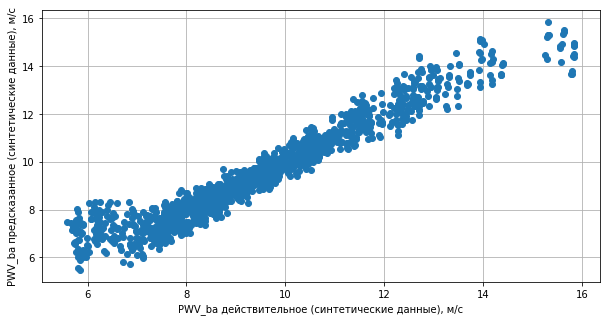

In [74]:
predicted = reg.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(Y_test, predicted, 'o')
plt.xlabel('PWV_ba действительное (синтетические данные), м/с')
plt.ylabel('PWV_ba предсказанное (синтетические данные), м/с')
plt.grid(True)
#plt.show()
plt.savefig('Linear regression virtual dataset')

In [75]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predicted)

0.29138558906034107

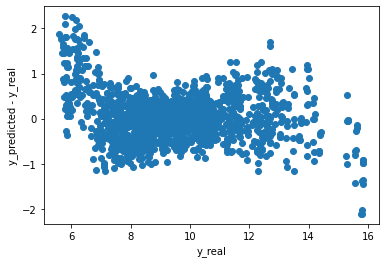

In [76]:
bland_altman(predicted, Y_test)

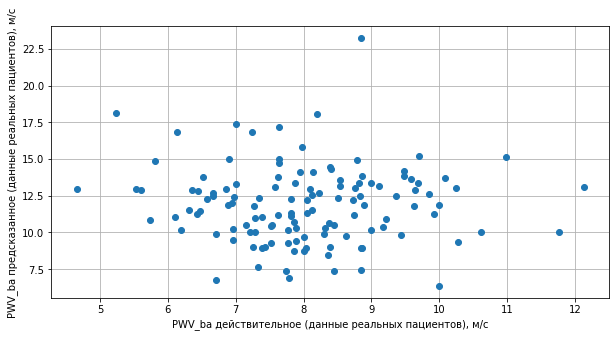

In [77]:
predicted = reg.predict(X_real)
plt.figure(figsize=(10, 5))
plt.plot(Y_real, predicted, 'o')
plt.xlabel('PWV_ba действительное (данные реальных пациентов), м/с')
plt.ylabel('PWV_ba предсказанное (данные реальных пациентов), м/с')
plt.grid(True)
#plt.show()
plt.savefig('Linear regression real dataset')

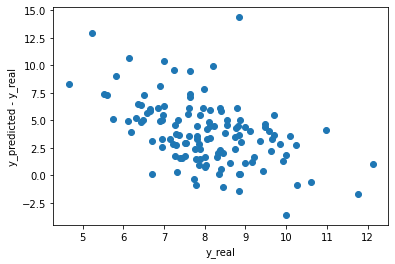

In [78]:
bland_altman(predicted, Y_real)

In [79]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_real, predicted)

23.609144449992332

In [80]:
y_real_values = Y_real.values.ravel()

abs_in_percent = []

for i in range(len(y_real_values)):
    y_abs_percent = abs((y_real_values[i] - predicted[i])) * 100 / y_real_values[i]
    abs_in_percent.append(y_abs_percent)


#print(abs_in_percent)
print(f'Максимальное отклонение от искомой величины: {round(max(abs_in_percent))}%')
print(f'Среднее отклонение от искомой величины: {round(sum(abs_in_percent)/len(abs_in_percent))}%')

Максимальное отклонение от искомой величины: 247%
Среднее отклонение от искомой величины: 54%


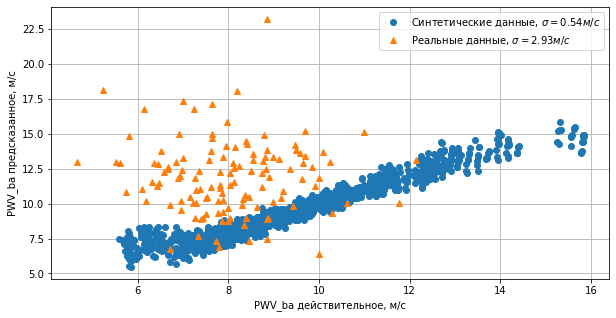

In [81]:
predicted_test = reg.predict(X_test)
predicted_real = reg.predict(X_real)

plt.figure(figsize=(10, 5))
plt.plot(Y_test, predicted_test, 'o', label='Синтетические данные, $\sigma=0.54 м/c$')
plt.plot(Y_real, predicted_real, '^', label='Реальные данные, $\sigma=2.93 м/c$')
plt.xlabel('PWV_ba действительное, м/с')
plt.ylabel('PWV_ba предсказанное, м/с')
plt.legend()
plt.grid(True)
plt.savefig('TOGETHER Linear regression real dataset')

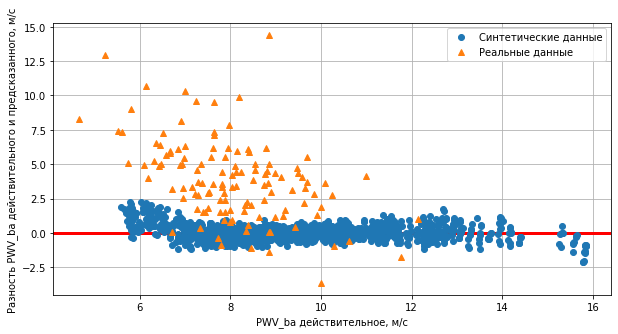

In [82]:
bland_altman_together('LINEAR', predicted_test, Y_test, predicted_real, Y_real)

In [83]:
import numpy as np

print(f'Среднеквадратичное отклонение {np.std(np.array(Y_real).T - np.array(predicted_real))}')

Среднеквадратичное отклонение 2.931842559819329


In [84]:
import numpy as np

print(f'Среднеквадратичное отклонение {np.std(np.array(Y_test).T - np.array(predicted_test))}')

Среднеквадратичное отклонение 0.5388775881552477


# SVM

In [85]:
from sklearn import svm

regr = svm.SVR()
regr.fit(X_train, Y_train.values.ravel())

SVR()

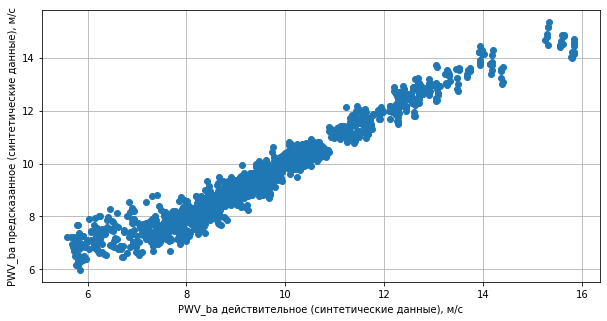

In [86]:
predicted = regr.predict(X_test)
plt.figure(figsize=(10, 5))
plt.plot(Y_test, predicted, 'o')
plt.xlabel('PWV_ba действительное (синтетические данные), м/с')
plt.ylabel('PWV_ba предсказанное (синтетические данные), м/с')
plt.grid(True)
#plt.show()
plt.savefig('SVM virtual dataset')

In [87]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predicted)

0.2309536269366101

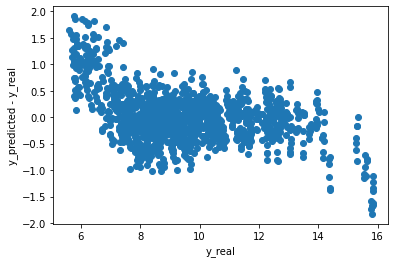

In [88]:
bland_altman(predicted, Y_test)

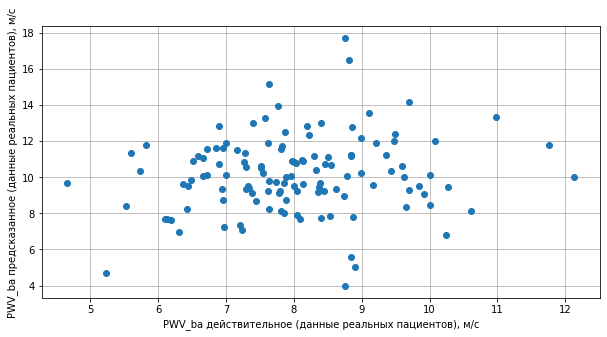

In [89]:
predicted = regr.predict(X_real)
plt.figure(figsize=(10, 5))
plt.plot(Y_real, predicted, 'o')
plt.xlabel('PWV_ba действительное (данные реальных пациентов), м/с')
plt.ylabel('PWV_ba предсказанное (данные реальных пациентов), м/с')
plt.grid(True)
#plt.show()
plt.savefig('SVM real dataset')

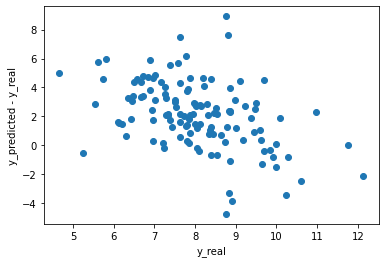

In [90]:
bland_altman(predicted, Y_real)

In [91]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_real, predicted)

9.945583435535966

In [92]:
y_real_values = Y_real.values.ravel()

abs_in_percent = []

for i in range(len(y_real_values)):
    y_abs_percent = abs((y_real_values[i] - predicted[i])) * 100 / y_real_values[i]
    abs_in_percent.append(y_abs_percent)

#print(abs_in_percent)
print(f'Максимальное отклонение от искомой величины: {round(max(abs_in_percent))}%')
print(f'Среднее отклонение от искомой величины: {round(sum(abs_in_percent)/len(abs_in_percent))}%')

Максимальное отклонение от искомой величины: 108%
Среднее отклонение от искомой величины: 34%


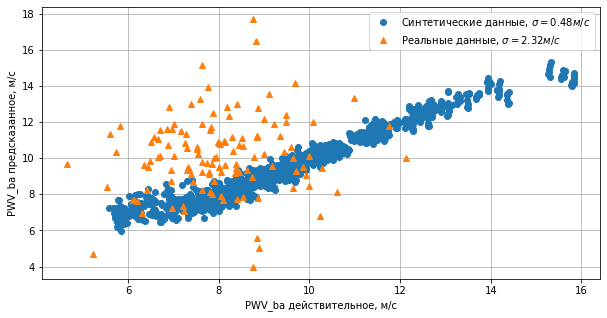

In [93]:
predicted_test = regr.predict(X_test)
predicted_real = regr.predict(X_real)
plt.figure(figsize=(10, 5))
plt.plot(Y_test, predicted_test, 'o', label='Синтетические данные, $\sigma=0.48 м/c$')
plt.plot(Y_real, predicted_real, '^', label='Реальные данные, $\sigma=2.32 м/c$')
plt.xlabel('PWV_ba действительное, м/с')
plt.ylabel('PWV_ba предсказанное, м/с')
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('TOGETHER SVM virtual dataset')

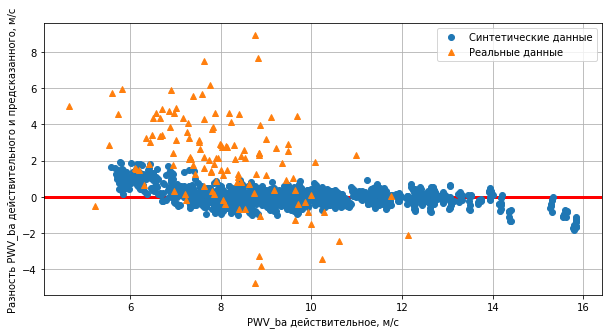

In [94]:
bland_altman_together('SVM', predicted_test, Y_test, predicted_real, Y_real)

In [95]:
import numpy as np

print(f'Среднеквадратичное отклонение {np.std(np.array(Y_real).T - np.array(predicted_real))}')

Среднеквадратичное отклонение 2.315154368361714


In [96]:
import numpy as np

print(f'Среднеквадратичное отклонение {np.std(np.array(Y_test).T - np.array(predicted_test))}')

Среднеквадратичное отклонение 0.4799529275461951


# DecisionTreeRegressor

In [97]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)

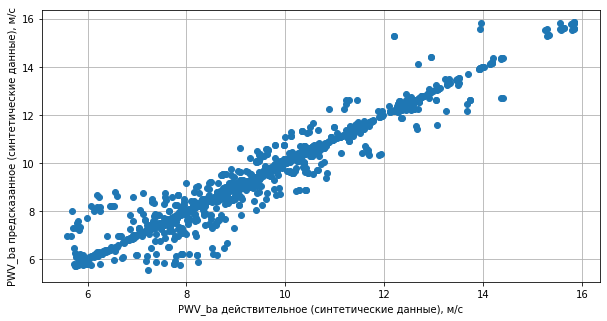

In [98]:
predicted = clf.predict(X_test)
plt.figure(figsize=(10, 5))
plt.plot(Y_test, predicted, 'o')
plt.xlabel('PWV_ba действительное (синтетические данные), м/с')
plt.ylabel('PWV_ba предсказанное (синтетические данные), м/с')
plt.grid(True)
#plt.show()
plt.savefig('DecisionTreeRegressor virtual dataset')

In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predicted)

0.27458027896002574

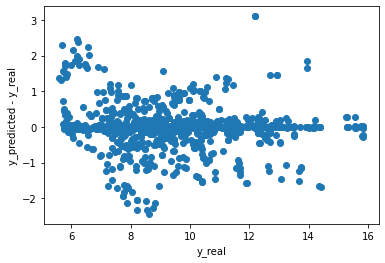

In [100]:
bland_altman(predicted, Y_test)

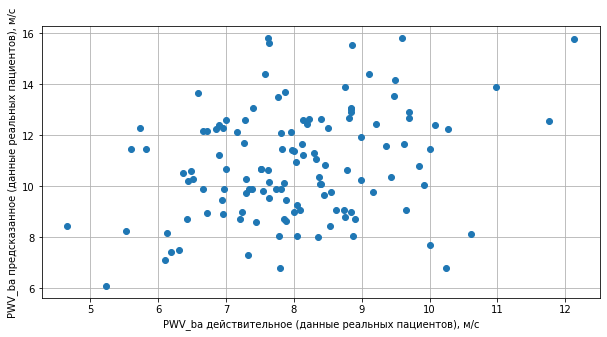

In [101]:
predicted = clf.predict(X_real)
plt.figure(figsize=(10, 5))
plt.plot(Y_real, predicted, 'o')
plt.xlabel('PWV_ba действительное (данные реальных пациентов), м/с')
plt.ylabel('PWV_ba предсказанное (данные реальных пациентов), м/с')
plt.grid(True)
#plt.show()
plt.savefig('DecisionTreeRegressor real dataset')

In [102]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_real, predicted)

12.303369400333784

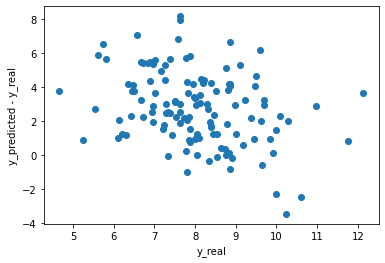

In [103]:
bland_altman(predicted, Y_real)

In [104]:
y_real_values = Y_real.values.ravel()

abs_in_percent = []

for i in range(len(y_real_values)):
    y_abs_percent = abs((y_real_values[i] - predicted[i])) * 100 / y_real_values[i]
    abs_in_percent.append(y_abs_percent)

#print(abs_in_percent)
print(f'Максимальное отклонение от искомой величины: {round(max(abs_in_percent))}%')
print(f'Среднее отклонение от искомой величины: {round(sum(abs_in_percent)/len(abs_in_percent))}%')

Максимальное отклонение от искомой величины: 114%
Среднее отклонение от искомой величины: 39%


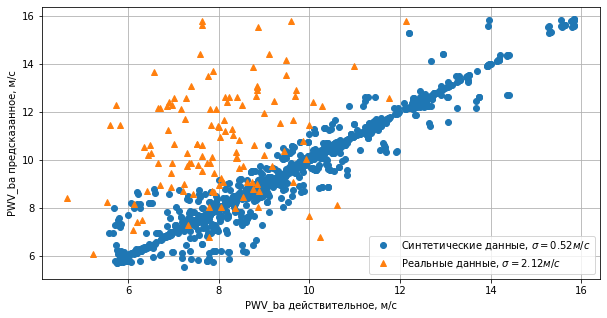

In [105]:
predicted_test = clf.predict(X_test)
predicted_real = clf.predict(X_real)

plt.figure(figsize=(10, 5))
plt.plot(Y_test, predicted_test, 'o', label='Синтетические данные, $\sigma=0.52 м/c$')
plt.plot(Y_real, predicted_real, '^', label='Реальные данные, $\sigma=2.12 м/c$')
plt.xlabel('PWV_ba действительное, м/с')
plt.ylabel('PWV_ba предсказанное, м/с')
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('TOGETHER DecisionTreeRegressor virtual dataset')

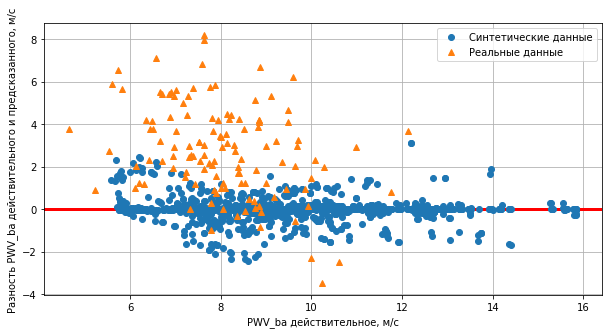

In [106]:
bland_altman_together('DECISIONTREE', predicted_test, Y_test, predicted_real, Y_real)

In [107]:
import numpy as np

print(f'Среднеквадратичное отклонение {np.std(np.array(Y_real).T - np.array(predicted_real))}')

Среднеквадратичное отклонение 2.1324576386415344


In [108]:
import numpy as np

print(f'Среднеквадратичное отклонение {np.std(np.array(Y_test).T - np.array(predicted_test))}')

Среднеквадратичное отклонение 0.5238584574166117


# KNeighborsRegressor

In [109]:
from sklearn import neighbors

n_neighbors = 10
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
knn = knn.fit(X_train, Y_train)

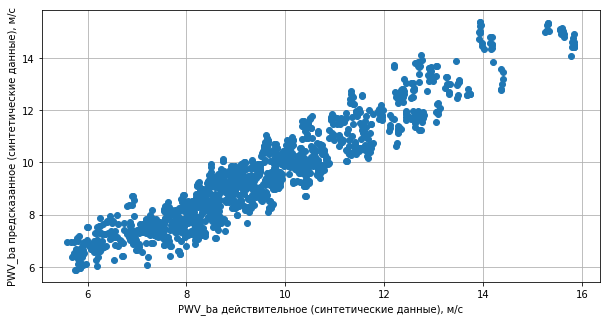

In [110]:
predicted = knn.predict(X_test)
plt.figure(figsize=(10, 5))
plt.plot(Y_test, predicted, 'o')
plt.xlabel('PWV_ba действительное (синтетические данные), м/с')
plt.ylabel('PWV_ba предсказанное (синтетические данные), м/с')
plt.grid(True)
#plt.show()
plt.savefig('KNeighborsRegressor virtual dataset')

In [111]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predicted)

0.4593333161438076

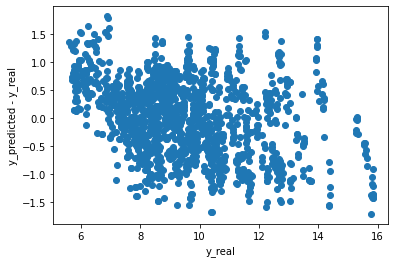

In [112]:
bland_altman(predicted, Y_test)

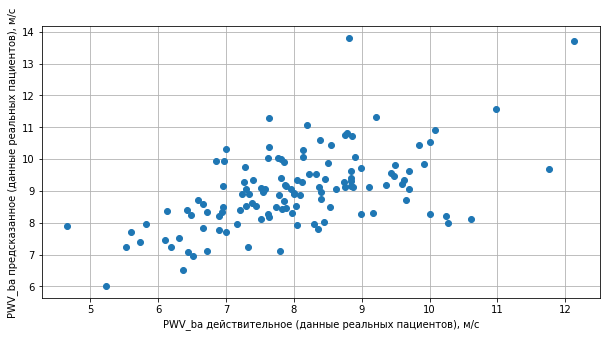

In [113]:
predicted = knn.predict(X_real)
plt.figure(figsize=(10, 5))
plt.plot(Y_real, predicted, 'o')
plt.xlabel('PWV_ba действительное (данные реальных пациентов), м/с')
plt.ylabel('PWV_ba предсказанное (данные реальных пациентов), м/с')
plt.grid(True)
#plt.show()
plt.savefig('KNeighborsRegressor real dataset')

In [114]:
print(Y_real)

        PWV_ba
0    10.084746
1     7.212121
2     7.239264
3     6.134021
4     8.814815
..         ...
120   5.530303
121  10.277778
122   7.789474
123   7.872340
124   8.539326

[125 rows x 1 columns]


In [115]:
print(data_real)

         ID    №                          ФИО  Age  HR      SV  SBP_b  DBP_b  \
0    124625  165  Евко Назия Фаттахутдиновна    71  73   35.88    110     86   
1    130589  323    Парахина Любовь Борисовна   62  68   57.60     98     83   
2    147549  459    Трунина Галина Тимофеевна   68  69   42.90    106     81   
3    148272  467    Попова Татьяна Васильевна   47  69   46.80     91     73   
4    148795  477      Шмелева Нина Максимовна   78  52   30.80    113     72   
..      ...  ...                          ...  ...  ..     ...    ...    ...   
120  124238  156    Никишкин Роман Эдуардович   23  48   73.92     95     73   
121  130025  326       Злыднев Андрей Юрьевич   37  77   93.80    181    144   
122  130469  331    Прояев Игорь Владимирович   57  73  115.00     97     82   
123  146798  418   Вдовин Сергей Валентинович   56  67   60.50    106     89   
124  149107  482   Еремеев Борис Владимирович   58  72   65.52    133    117   

     SBP_a  DBP_a       MBP_b       MPB

In [116]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_real, predicted)

2.378424477949785

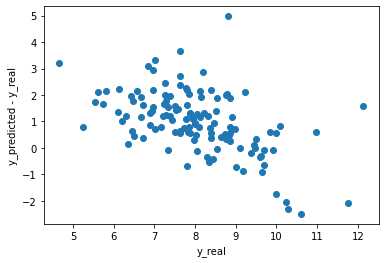

In [117]:
bland_altman(predicted, Y_real)

In [118]:
y_real_values = Y_real.values.ravel()

abs_in_percent = []

for i in range(len(y_real_values)):
    y_abs_percent = abs((y_real_values[i] - predicted[i][0])) * 100 / y_real_values[i]
    abs_in_percent.append(y_abs_percent)

#print(abs_in_percent)
#print(predicted)
print(f'Максимальное отклонение от искомой величины: {round(max(abs_in_percent))}%')
print(f'Среднее отклонение от искомой величины: {round(sum(abs_in_percent)/len(abs_in_percent))}%')

Максимальное отклонение от искомой величины: 69%
Среднее отклонение от искомой величины: 17%


In [122]:
man_error = []
woman_error = []

for i in range(len(abs_in_percent)):
    is_woman = data_sex.iloc[i]['Sex']
    if is_woman:
        woman_error.append(y_real_values[i] - predicted[i][0])
    else:
        man_error.append(y_real_values[i] - predicted[i][0])
        
print(np.std(woman_error))
print(np.std(man_error))

1.2951097173744048
1.0296252247796065


[8.318973063896502, 16.640250436907564, 22.83222704816308, 36.587112646618245, 56.442399147966654, 22.082326505241507, 35.659464401574276, 6.58228401976521, 6.240873623531064, 23.541879788324206, 27.712698715437057, 0.056753746300298155, 5.343476601165013, 69.32405498472396, 23.110903968656462, 19.85618709257947, 36.90606918363669, 47.4155171510189, 35.02012836222988, 7.979413908471583, 27.840855038507037, 23.808503994295876, 26.69364371924018, 21.958738328065074, 12.940665753973704, 10.940180187444051, 0.9307777224331858, 22.976579751535024, 14.696753791150249, 28.87013564776173, 16.58070902270895, 0.6621471191372666, 45.243622519268406, 15.883723406213708, 33.886166885481344, 7.144656262402041, 2.268001777408716, 31.641322021167337, 21.189063225360886, 17.323057533859398, 26.2834039987145, 22.90852200179728, 6.105973579533177, 12.517505667813433]
[12.953063461690972, 47.85099296324329, 3.977881303765105, 6.102934840388949, 11.0286263510367, 32.52969117051401, 37.42851465985544, 6.695

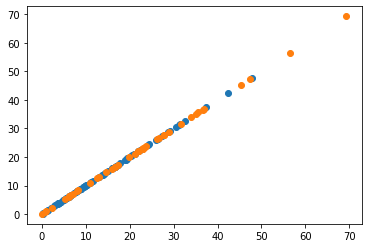

In [90]:
print(woman_error)
print(man_error)
plt.plot(man_error, man_error, 'o')
plt.plot(woman_error, woman_error, 'o')
plt.show()

In [91]:
import numpy as np
arr = np.array(abs_in_percent)
arr.argsort()[-10:][::-1] # for max
arr.argsort()[:10] # for min

for arg in arr.argsort()[:10]:
    print(data_real.iloc[arg])

ID                          147382
№                              442
ФИО       Лосева Галина Николаевна
Age                             72
HR                              78
SV                           59.59
SBP_b                           98
DBP_b                           79
SBP_a                          113
DBP_a                           75
MBP_b                    85.333333
MPB_a                    87.666667
PWV_ba                    9.111111
Name: 11, dtype: object
ID                               143671
№                                   372
ФИО       Черноусов Анатолий Викторович
Age                                  63
HR                                   70
SV                                71.39
SBP_b                               127
DBP_b                               115
SBP_a                               146
DBP_a                               102
MBP_b                             119.0
MPB_a                        116.666667
PWV_ba                         9.481481
N

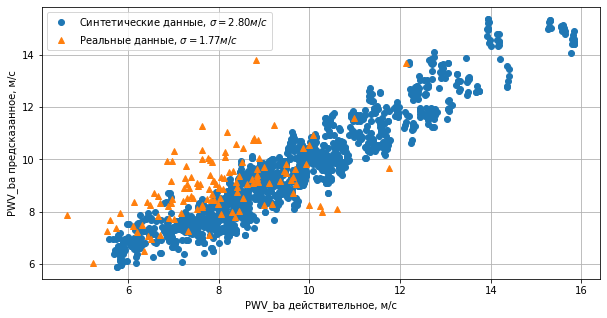

In [101]:
predicted_test = knn.predict(X_test)
predicted_real = knn.predict(X_real)

plt.figure(figsize=(10, 5))
plt.plot(Y_test, predicted_test, 'o', label='Синтетические данные, $\sigma=2.80 м/c$')
plt.plot(Y_real, predicted_real, '^', label='Реальные данные, $\sigma=1.77 м/c$')
plt.xlabel('PWV_ba действительное, м/с')
plt.ylabel('PWV_ba предсказанное, м/с')
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('TOGETHER KNeighborsRegressor virtual dataset')

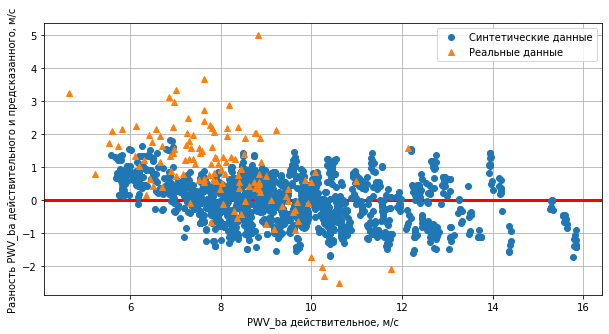

In [97]:
bland_altman_together('KNN', predicted_test, Y_test, predicted_real, Y_real)

In [98]:
import numpy as np

print(f'Среднеквадратичное отклонение {np.std(np.array(Y_real).T - np.array(predicted_real))}')

Среднеквадратичное отклонение 1.7674388936393062


In [100]:
import numpy as np

print(f'Среднеквадратичное отклонение {np.std(np.array(Y_test).T - np.array(predicted_test))}')

Среднеквадратичное отклонение 2.8191235780577935


[21.79426599]
[13.93263186]


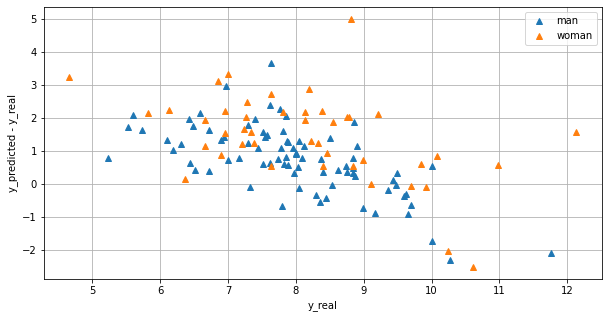

In [2307]:
raznost_test = []
raznost_real = []
for i in range(len(predicted_test)):
    raznost_test.append(predicted_test[i] - Y_test.values[i][0])


for i in range(len(predicted_real)):
    raznost_real.append(predicted_real[i] - Y_real.values[i][0])

plt.figure(figsize=(10, 5))


man_raznost_x = []
man_raznost_y = []

woman_raznost_x = []
woman_raznost_y = []

srednee_woman = []
srednee_man = []

for i in range(len(raznost_real)):
    is_woman = data_sex.iloc[i]['Sex']
    if is_woman:
        woman_raznost_x.append(Y_real.iloc[i])
        woman_raznost_y.append(raznost_real[i])
        srednee_woman.append(abs(raznost_real[i])/Y_real.iloc[i]['PWV_ba'])
        
    else:
        man_raznost_x.append(Y_real.iloc[i])
        man_raznost_y.append(raznost_real[i])
        srednee_man.append(abs(raznost_real[i])/Y_real.iloc[i]['PWV_ba'])
        
#plt.plot(Y_test, raznost_test, 'o')
plt.plot(man_raznost_x, man_raznost_y, '^', label='man')
plt.plot(woman_raznost_x, woman_raznost_y, '^', label='woman')
plt.legend()
plt.xlabel('y_real')
plt.ylabel('y_predicted - y_real')
plt.grid(True)

#посчитать среднее, среднеквадратичное отклонение. отклонение в процентах и взять среднее
print(sum(srednee_woman)/len(srednee_woman) *100)
print(sum(srednee_man)/len(srednee_man)*100)

# KernelRidge

In [102]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.1, kernel='polynomial', degree=2)
clf.fit(X_train, Y_train)

KernelRidge(alpha=0.1, degree=2, kernel='polynomial')

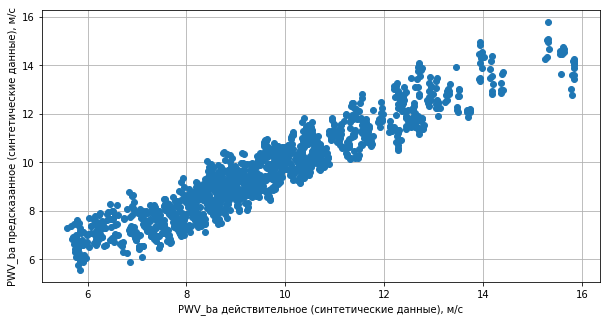

In [103]:
predicted = clf.predict(X_test)
plt.figure(figsize=(10, 5))
plt.plot(Y_test, predicted, 'o')
plt.xlabel('PWV_ba действительное (синтетические данные), м/с')
plt.ylabel('PWV_ba предсказанное (синтетические данные), м/с')
plt.grid(True)
#plt.show()
plt.savefig('KernelRidge virtual dataset')

In [104]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predicted)

0.4776113492710157

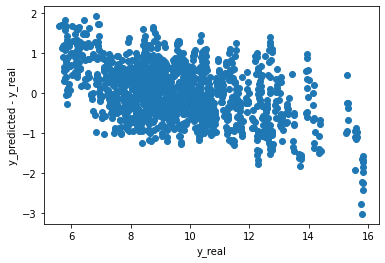

In [105]:
bland_altman(predicted, Y_test)

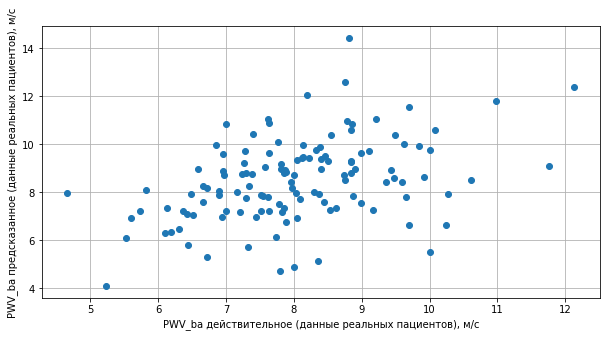

In [106]:
predicted = clf.predict(X_real)
plt.figure(figsize=(10, 5))
plt.xlabel('PWV_ba действительное (данные реальных пациентов), м/с')
plt.ylabel('PWV_ba предсказанное (данные реальных пациентов), м/с')
plt.plot(Y_real, predicted, 'o')
plt.grid(True)
#plt.show()
plt.savefig('KernelRidge real dataset')

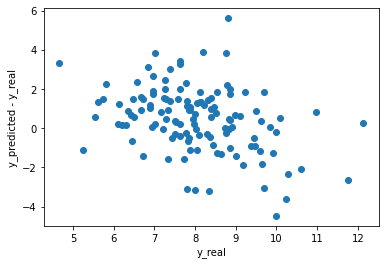

In [107]:
bland_altman(predicted, Y_real)

In [108]:
y_real_values = Y_real.values.ravel()

abs_in_percent = []

for i in range(len(y_real_values)):
    y_abs_percent = abs((y_real_values[i] - predicted[i][0])) * 100 / y_real_values[i]
    abs_in_percent.append(y_abs_percent)

#print(abs_in_percent)
#print(predicted)
print(f'Максимальное отклонение от искомой величины: {round(max(abs_in_percent))}%')
print(f'Среднее отклонение от искомой величины: {round(sum(abs_in_percent)/len(abs_in_percent))}%')

Максимальное отклонение от искомой величины: 71%
Среднее отклонение от искомой величины: 17%


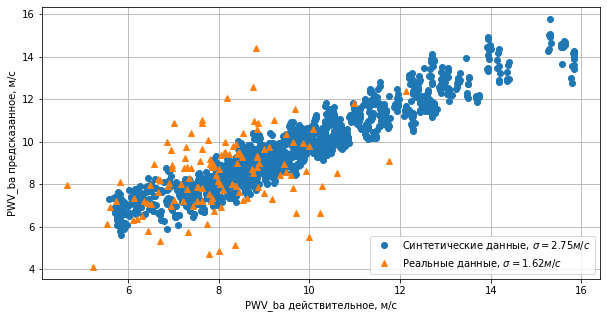

In [113]:
predicted_test = clf.predict(X_test)
predicted_real = clf.predict(X_real)

plt.figure(figsize=(10, 5))
plt.plot(Y_test, predicted_test, 'o', label='Синтетические данные, $\sigma=2.75 м/c$')
plt.plot(Y_real, predicted_real, '^', label='Реальные данные, $\sigma=1.62 м/c$')
plt.xlabel('PWV_ba действительное, м/с')
plt.ylabel('PWV_ba предсказанное, м/с')
plt.legend()
plt.grid(True)
#plt.show()
plt.savefig('TOGETHER KernelRidge virtual dataset')

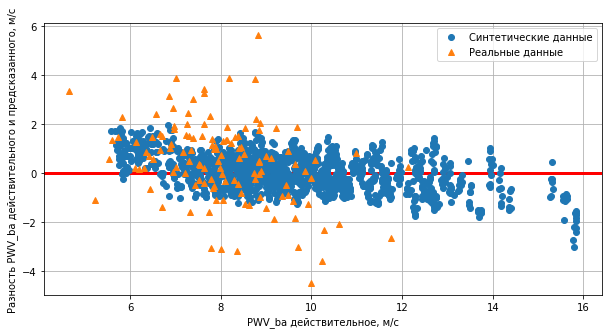

In [114]:
bland_altman_together('KERNELRIDGE', predicted_test, Y_test, predicted_real, Y_real)

In [111]:
import numpy as np

print(f'Среднеквадратичное отклонение {np.std(np.array(Y_real).T - np.array(predicted_real))}')

Среднеквадратичное отклонение 2.1287089672512893


In [112]:
import numpy as np

print(f'Среднеквадратичное отклонение {np.std(np.array(Y_test).T - np.array(predicted_test))}')

Среднеквадратичное отклонение 2.75287290859034


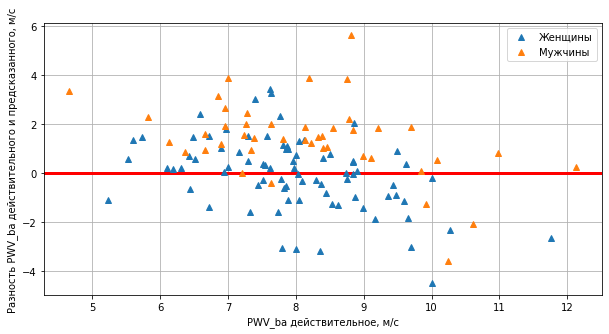

In [2200]:
raznost_test = []
raznost_real = []
for i in range(len(predicted_test)):
    raznost_test.append(predicted_test[i] - Y_test.values[i][0])


for i in range(len(predicted_real)):
    raznost_real.append(predicted_real[i] - Y_real.values[i][0])

plt.figure(figsize=(10, 5))


man_raznost_x = []
man_raznost_y = []

woman_raznost_x = []
woman_raznost_y = []


for i in range(len(raznost_real)):
    is_woman = data_sex.iloc[i]['Sex']
    if is_woman:
        woman_raznost_x.append(Y_real.iloc[i])
        woman_raznost_y.append(raznost_real[i])
    else:
        man_raznost_x.append(Y_real.iloc[i])
        man_raznost_y.append(raznost_real[i])
        
#plt.plot(Y_test, raznost_test, 'o')
plt.axhline(y=0, color='r', linestyle='-', lw=3)
plt.plot(man_raznost_x, man_raznost_y, '^', label='Женщины')
plt.plot(woman_raznost_x, woman_raznost_y, '^', label='Мужчины')
plt.legend()
plt.xlabel('PWV_ba действительное, м/с')
plt.ylabel('Разность PWV_ba действительного и предсказанного, м/с')
plt.grid(True)
plt.savefig('BLAND ALTMAN man woman.png')


## KernelRidge try to correct with linear regression

In [2201]:
X_real_train, X_real_test, Y_real_train, Y_real_test = train_test_split(X_real, Y_real, test_size=0.33, random_state=42)

In [2202]:
Y_real_train_predicted_train = clf.predict(X_real_train)
Y_real_test_predicted_test = clf.predict(X_real_test)

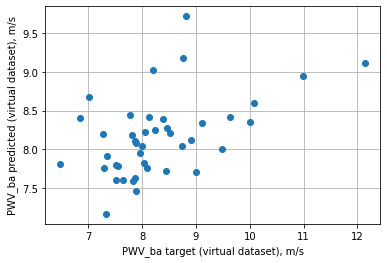

In [2203]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Y_real_train_predicted_train, Y_real_train.values.ravel())

predicted = reg.predict(Y_real_test_predicted_test)

plt.plot(Y_real_test, predicted, 'o')
plt.xlabel('PWV_ba target (virtual dataset), m/s')
plt.ylabel('PWV_ba predicted (virtual dataset), m/s')
plt.grid(True)
#plt.show()
plt.savefig('Linear regression virtual dataset')

## Kernel Ridge together with LinearRegression

In [2204]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression

def fit_together(X_train, Y_train, X_real_train, Y_real_train):
    clf = KernelRidge(alpha=0.1, kernel='polynomial', degree=2)
    clf.fit(X_train, Y_train)
    
    Y_real_train_predicted_train = clf.predict(X_real_train)
    Y_real_test_predicted_test = clf.predict(X_real_test)
    reg = LinearRegression()
    reg.fit(Y_real_train_predicted_train, Y_real_train.values.ravel())
    return clf, reg


clf, reg = fit_together(X_train, Y_train, X_real_train, Y_real_train)

predicted_real_final = reg.predict(clf.predict(X_real))

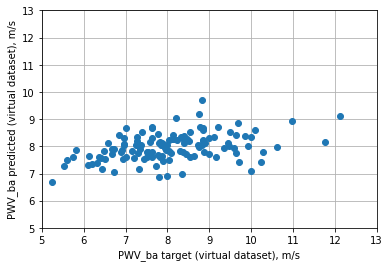

In [2205]:
plt.plot(Y_real, predicted_real_final, 'o')
plt.xlabel('PWV_ba target (virtual dataset), m/s')
plt.ylabel('PWV_ba predicted (virtual dataset), m/s')
plt.xlim(5, 13)
plt.ylim(5, 13)
plt.grid(True)
#plt.show()
plt.savefig('Linear regression virtual dataset')

In [2206]:
y_real_values = Y_real.values.ravel()

abs_in_percent = []

for i in range(len(y_real_values)):
    y_abs_percent = abs((y_real_values[i] - predicted_real_final[i])) * 100 / y_real_values[i]
    abs_in_percent.append(y_abs_percent)

#print(abs_in_percent)
#print(predicted)
print(f'Максимальное отклонение от искомой величины: {round(max(abs_in_percent))}%')
print(f'Среднее отклонение от искомой величины: {round(sum(abs_in_percent)/len(abs_in_percent))}%')

Максимальное отклонение от искомой величины: 68%
Среднее отклонение от искомой величины: 12%


## KernelRidge Gradient Descent

In [2207]:
import random

alpha_min = 0.001
alpha_max = 5

def kernel_ridge_criterion_function(alpha):
    # Тренимм наш классификатор
    clf = KernelRidge(alpha=alpha, kernel='polynomial', degree=2)
    clf.fit(X_train, Y_train)
    predicted = clf.predict(X_test)
    
    creterion_value = mean_squared_error(Y_test, predicted)
    return creterion_value
    

def gradient_descent(criterion_function, step=0.5, beta=0.1):
    alpha_0 = random.uniform(alpha_min, alpha_max)
    
    for i in range(300):
        criterion_value_0 = criterion_function(alpha_0)
        print(alpha_0, criterion_value_0)
        alpha_target = alpha_0 + step
        criterion_value = criterion_function(alpha_target)

        grad = (criterion_value - criterion_value_0)/step
        alpha_0 = alpha_0 - grad*beta
    
    return alpha_0



In [1547]:
a = gradient_descent(kernel_ridge_criterion_function)

1.0627241539868384 1.0005466414086004
1.0147679405794512 0.9760061125918286
0.9662456228512666 0.9509173809183633
0.9171540272189123 0.9252792052197298
0.8674923282242132 0.8990947697879453
0.8172626840509322 0.8723729621506161
0.7664710251336048 0.8451299592368626
0.7151280301856389 0.8173911740311813
0.6632503279333449 0.7891935985063789
0.6108619625794627 0.7605885264009513
0.5579961498269836 0.7316445068112016
0.504697313427704 0.702450067849607
0.4510232970276784 0.6731150318418552
0.39704741851003067 0.643767571699235
0.34285949923823117 0.6145401146386791
0.28856372046605666 0.5855267571895383
0.23426793967524515 0.556665030023265
0.18005028214403931 0.527395924646908
0.12586120565940023 0.495546035750698
0.07121264556020722 0.4524660453347779
0.013928948724929217 0.3463446647459306


/Library/Python/3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


-0.0583029997555835 0.960534307515773
0.00019770180919479602 0.2090817524698974


/Library/Python/3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


-0.09798338450769581 0.7616722799803631


/Library/Python/3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


-0.0749410688460323 0.827446688240524


/Library/Python/3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


-0.04124639975354111 1.4665328264023645
0.116593626972604 0.48944333196572515
0.0617377046887391 0.4420459718914176
0.0034080438480668385 0.2981138853166803


/Library/Python/3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


-0.07731804542146235 0.8166709958016496


/Library/Python/3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


-0.04552000980970624 1.2497383821854502
0.06942753973529531 0.45061017235121076
0.011968226855574478 0.3394676070384127


/Library/Python/3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


-0.061424405763608685 0.9243082057033765


/Library/Python/3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


-0.009828817789031177 0.49377507398179193


/Library/Python/3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


-0.04997400287692939 1.1105296079176423
0.037617693262105255 0.40638004460922234


/Library/Python/3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


-0.02520225875605988 20.748600673264153
3.9872988212658904 2.0531707826743433
3.963947906270168 2.0473974596718256
3.940477425808055 2.0415640475735026
3.9168858804833264 2.035669470606028
3.8931717413234095 2.0297126258506535
3.8693334489920956 2.0236923823648234
3.845369412976234 2.017607580269351
3.821278010745406 2.0114570297995766
3.7970575868835152 2.0052395103189724
3.7727064521912235 1.9989537692933206
3.7482228827580677 1.9925985212237702
3.7236051190030865 1.9861724465367938
3.69885136468271 1.979674190429025
3.673959785864607 1.9731023616649501
3.648928509866166 1.9664555313251049


KeyboardInterrupt: 

# PCA

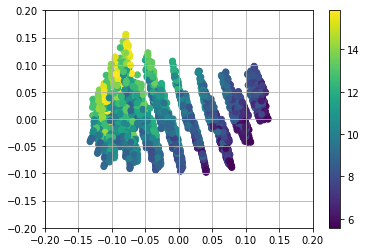

In [2208]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)

X_transformed_train = pca.transform(X_train)
#Y_transformed_train = pca.transform(Y_train)

X_test_transformed = pca.transform(X_test)
#Y_test_transformed = pca.transform(Y_test)

plt.scatter(X_transformed_train[:,0], X_transformed_train[:,1], c=Y_train.values)
plt.grid()
plt.colorbar()
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.savefig("PCA v")

(-0.2, 0.2)

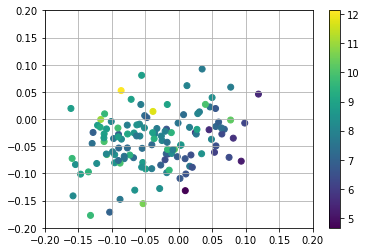

In [2209]:
X_transformed_real = pca.transform(X_real)
plt.scatter(X_transformed_real[:,0], X_transformed_real[:,1], c=Y_real.values)

plt.grid()
plt.colorbar()
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)

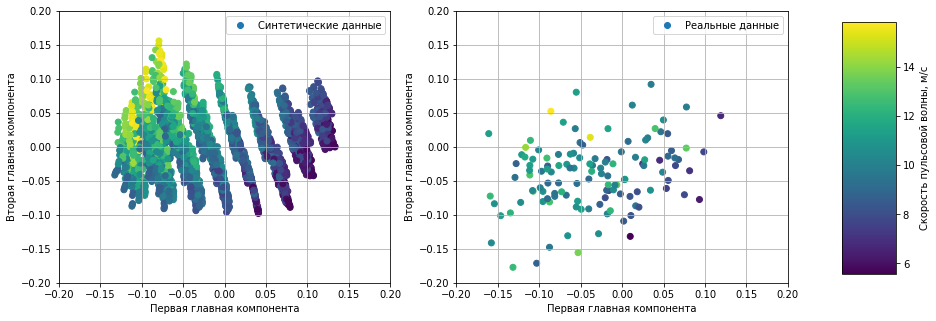

In [2210]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

im = axs[0].scatter(X_transformed_train[:,0], X_transformed_train[:,1], c=Y_train.values, label='Синтетические данные')
im2 = axs[1].scatter(X_transformed_real[:,0], X_transformed_real[:,1], c=Y_real.values, label='Реальные данные')

axs[0].grid()
axs[1].grid()

axs[0].set_xlabel('Первая главная компонента')
axs[0].set_ylabel('Вторая главная компонента')
axs[0].set_xlim([-0.2, 0.2])
axs[0].set_ylim([-0.2, 0.2])
axs[0].legend()

axs[1].set_xlabel('Первая главная компонента')
axs[1].set_ylabel('Вторая главная компонента')
axs[1].set_xlim([-0.2, 0.2])
axs[1].set_ylim([-0.2, 0.2])
axs[1].legend()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Скорость пульсовой волны, м/c')
#plt.show()
plt.savefig('PCA.png')

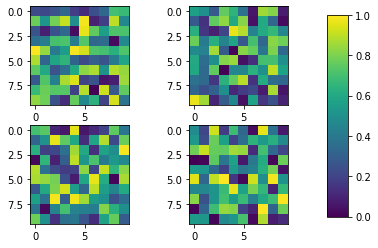

In [2211]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

# KNN на PCA

In [2212]:
from sklearn import neighbors

n_neighbors = 10
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
knn = knn.fit(X_transformed_train, Y_train)

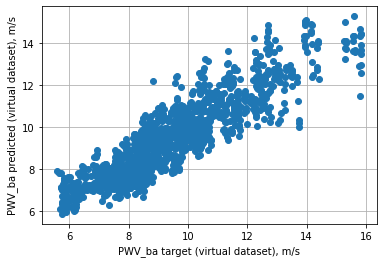

In [2213]:
predicted = knn.predict(X_test_transformed)
plt.plot(Y_test, predicted, 'o')
plt.xlabel('PWV_ba target (virtual dataset), m/s')
plt.ylabel('PWV_ba predicted (virtual dataset), m/s')
plt.grid(True)
#plt.show()
plt.savefig('KNeighborsRegressor virtual dataset')

In [2214]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predicted)

0.8554071542473546

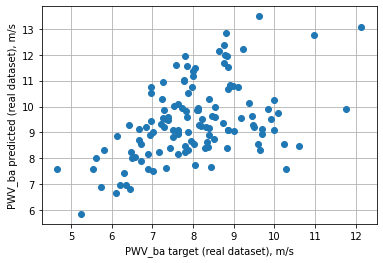

In [2215]:
predicted = knn.predict(X_transformed_real)
plt.plot(Y_real, predicted, 'o')
plt.xlabel('PWV_ba target (real dataset), m/s')
plt.ylabel('PWV_ba predicted (real dataset), m/s')
plt.grid(True)
#plt.show()
plt.savefig('KNeighborsRegressor real dataset')

In [2216]:
y_real_values = Y_real.values.ravel()

abs_in_percent = []

for i in range(len(y_real_values)):
    y_abs_percent = abs((y_real_values[i] - predicted[i][0])) * 100 / y_real_values[i]
    abs_in_percent.append(y_abs_percent)

#print(abs_in_percent)
#print(predicted)
print(f'Максимальное отклонение от искомой величины: {round(max(abs_in_percent))}%')
print(f'Среднее отклонение от искомой величины: {round(sum(abs_in_percent)/len(abs_in_percent))}%')

Максимальное отклонение от искомой величины: 63%
Среднее отклонение от искомой величины: 22%


# Нейросеть

In [45]:
featuresTrain = torch.from_numpy(X_train)
targetsTrain = torch.from_numpy(Y_train.values)#.type(torch.LongTensor) # data type is long

featuresTest = torch.from_numpy(X_test)
targetsTest = torch.from_numpy(Y_test.values)#.type(torch.LongTensor)

featuresTestReal = torch.from_numpy(X_real)
targetsTestReal = torch.from_numpy(Y_real.values)

train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)
real = torch.utils.data.TensorDataset(featuresTestReal, targetsTestReal)

train_loader = DataLoader(train, batch_size=32)
test_loader = DataLoader(test)
real_loader = DataLoader(real)

In [46]:
print(len(featuresTest))

1444


In [47]:
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 9 --> 7
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 7 --> 7
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        #self.tanh2 = nn.Tanh()
        
        # Linear function 3: 7 --> 7
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        #Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 7 --> 1
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.relu2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = len(X.columns)
# 2/3 * input_dim + 1
hidden_dim = 7#hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 1

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.MSELoss()

# SGD Optimizer
learning_rate = 0.02
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [48]:
# ANN model training
num_epochs = 30
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images).float()
        labels = Variable(labels).float()

        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)

        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()

        
        # Calculate Accuracy         
        correct = 0
        total = 0
        # Predict test dataset
        correctnes_list = []
        for images, labels in test_loader:

            test = Variable(images).float()

            # Forward propagation
            outputs = model(test)

            # Get predictions from the maximum value
            predicted = outputs.data[0]

            # Total number of labels
            total += len(labels)

            # Total correct predictions
            correctnes_list.append(abs(predicted-labels)*100/labels)

        accuracy = max(correctnes_list)
        count += 1
        # store loss and iteration
        loss_list.append(loss.data)
        iteration_list.append(count)
        accuracy_list.append(accuracy)
        if count % 10 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))


Iteration: 10  Loss: 96.60194396972656  Accuracy: tensor([[98.8764]], dtype=torch.float64) %
Iteration: 20  Loss: 75.8183822631836  Accuracy: tensor([[92.2785]], dtype=torch.float64) %
Iteration: 30  Loss: 39.86830520629883  Accuracy: tensor([[74.2341]], dtype=torch.float64) %
Iteration: 40  Loss: 5.20318603515625  Accuracy: tensor([[81.6195]], dtype=torch.float64) %
Iteration: 50  Loss: 6.780204772949219  Accuracy: tensor([[92.2061]], dtype=torch.float64) %
Iteration: 60  Loss: 3.6109535694122314  Accuracy: tensor([[54.4862]], dtype=torch.float64) %
Iteration: 70  Loss: 4.469764232635498  Accuracy: tensor([[62.7280]], dtype=torch.float64) %
Iteration: 80  Loss: 5.4713616371154785  Accuracy: tensor([[77.5862]], dtype=torch.float64) %
Iteration: 90  Loss: 3.419377326965332  Accuracy: tensor([[67.2954]], dtype=torch.float64) %
Iteration: 100  Loss: 3.3426523208618164  Accuracy: tensor([[61.7365]], dtype=torch.float64) %
Iteration: 110  Loss: 5.3536763191223145  Accuracy: tensor([[69.8246

Iteration: 880  Loss: 0.8032631874084473  Accuracy: tensor([[32.5534]], dtype=torch.float64) %
Iteration: 890  Loss: 1.081262469291687  Accuracy: tensor([[30.0783]], dtype=torch.float64) %
Iteration: 900  Loss: 0.9184157252311707  Accuracy: tensor([[27.7009]], dtype=torch.float64) %
Iteration: 910  Loss: 0.5976096987724304  Accuracy: tensor([[28.3030]], dtype=torch.float64) %
Iteration: 920  Loss: 0.4795910120010376  Accuracy: tensor([[28.0505]], dtype=torch.float64) %
Iteration: 930  Loss: 0.696881890296936  Accuracy: tensor([[29.7772]], dtype=torch.float64) %
Iteration: 940  Loss: 0.6542078256607056  Accuracy: tensor([[29.5218]], dtype=torch.float64) %
Iteration: 950  Loss: 0.5726702213287354  Accuracy: tensor([[27.9414]], dtype=torch.float64) %
Iteration: 960  Loss: 0.96771240234375  Accuracy: tensor([[27.7677]], dtype=torch.float64) %
Iteration: 970  Loss: 0.5807133316993713  Accuracy: tensor([[31.9350]], dtype=torch.float64) %
Iteration: 980  Loss: 0.5507492423057556  Accuracy: te

Iteration: 1740  Loss: 0.6220383048057556  Accuracy: tensor([[28.9978]], dtype=torch.float64) %
Iteration: 1750  Loss: 0.8452173471450806  Accuracy: tensor([[28.9669]], dtype=torch.float64) %
Iteration: 1760  Loss: 0.41321277618408203  Accuracy: tensor([[32.4077]], dtype=torch.float64) %
Iteration: 1770  Loss: 0.44506046175956726  Accuracy: tensor([[32.4309]], dtype=torch.float64) %
Iteration: 1780  Loss: 0.38929054141044617  Accuracy: tensor([[31.4782]], dtype=torch.float64) %
Iteration: 1790  Loss: 0.4548470973968506  Accuracy: tensor([[31.7248]], dtype=torch.float64) %
Iteration: 1800  Loss: 0.6535307168960571  Accuracy: tensor([[30.1914]], dtype=torch.float64) %
Iteration: 1810  Loss: 0.7574813961982727  Accuracy: tensor([[27.1009]], dtype=torch.float64) %
Iteration: 1820  Loss: 0.680172324180603  Accuracy: tensor([[25.9928]], dtype=torch.float64) %
Iteration: 1830  Loss: 0.6322144865989685  Accuracy: tensor([[25.5438]], dtype=torch.float64) %
Iteration: 1840  Loss: 0.6132732629776

Iteration: 2600  Loss: 0.39815086126327515  Accuracy: tensor([[35.0472]], dtype=torch.float64) %
Iteration: 2610  Loss: 0.35015442967414856  Accuracy: tensor([[36.7691]], dtype=torch.float64) %
Iteration: 2620  Loss: 0.7828563451766968  Accuracy: tensor([[31.8720]], dtype=torch.float64) %
Iteration: 2630  Loss: 0.3920629322528839  Accuracy: tensor([[27.7352]], dtype=torch.float64) %
Iteration: 2640  Loss: 0.6248197555541992  Accuracy: tensor([[25.5329]], dtype=torch.float64) %
Iteration: 2650  Loss: 0.3957673907279968  Accuracy: tensor([[29.7605]], dtype=torch.float64) %
Iteration: 2660  Loss: 0.5781695246696472  Accuracy: tensor([[30.6539]], dtype=torch.float64) %
Iteration: 2670  Loss: 0.7857239842414856  Accuracy: tensor([[30.7305]], dtype=torch.float64) %
Iteration: 2680  Loss: 0.4037756323814392  Accuracy: tensor([[33.7935]], dtype=torch.float64) %
Iteration: 2690  Loss: 0.4294106960296631  Accuracy: tensor([[33.6561]], dtype=torch.float64) %
Iteration: 2700  Loss: 0.3904029726982

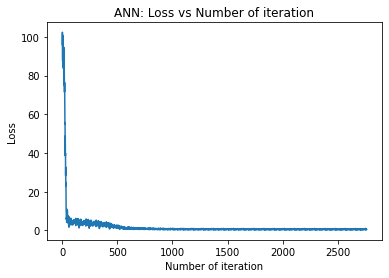

/Library/Python/3.8/site-packages/numpy/core/_asarray.py:171: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order, subok=True)
/Library/Python/3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


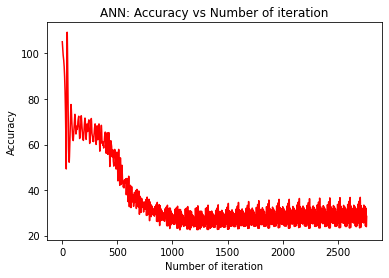

In [49]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

## Предсказания на тестовой выборке (синтезированные данные)

In [50]:
labels_list_test = []
predicted_list_test = []

for images, labels in test_loader:
    test = Variable(images).float()
    # Forward propagation
    outputs = model(test)

    # Get predictions from the maximum value
    predicted = outputs.data[0]

    labels_list_test.append(labels)
    predicted_list_test.append(predicted)

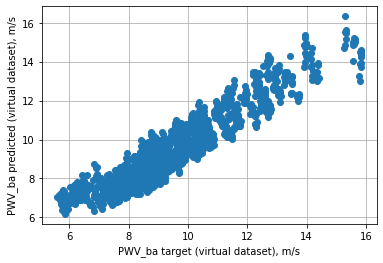

In [51]:
plt.plot(labels_list_test, predicted_list_test, 'o')
plt.xlabel('PWV_ba target (virtual dataset), m/s')
plt.ylabel('PWV_ba predicted (virtual dataset), m/s')
plt.grid(True)
plt.show()

In [52]:
labels_list_real = []
predicted_list_real = []

for images, labels in real_loader:
    test = Variable(images).float()
    # Forward propagation
    outputs = model(test)

    # Get predictions from the maximum value
    predicted = outputs.data[0]

    labels_list_real.append(labels)
    predicted_list_real.append(predicted)

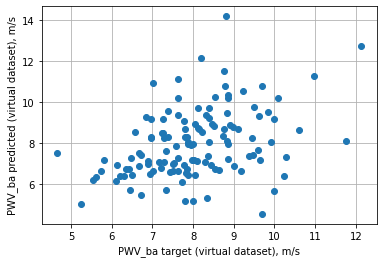

In [53]:
plt.plot(labels_list_real, predicted_list_real, 'o')
plt.xlabel('PWV_ba target (virtual dataset), m/s')
plt.ylabel('PWV_ba predicted (virtual dataset), m/s')
plt.grid(True)
plt.show()

In [54]:
abs_in_percent = []

for i in range(len(labels_list)):
    y_abs_percent = abs((labels_list[i][0] - predicted_list[i][0])) * 100 / labels_list[i][0]
    abs_in_percent.append(y_abs_percent.item())


print(f'Максимальное отклонение от искомой величины: {round(max(abs_in_percent))}%')
print(f'Среднее отклонение от искомой величины: {round(sum(abs_in_percent)/len(abs_in_percent))}%')

NameError: name 'labels_list' is not defined

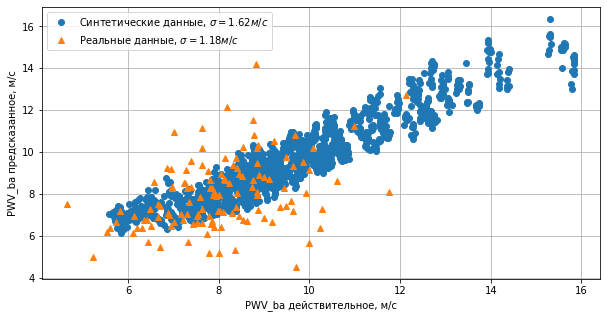

In [60]:
plt.clf()
plt.cla()
plt.close()
plt.figure(figsize=(10, 5))
plt.plot(labels_list_test, predicted_list_test, 'o', label='Синтетические данные, $\sigma=1.62 м/c$')
plt.plot(labels_list_real, predicted_list_real, '^', label='Реальные данные, $\sigma=1.18 м/c$')
plt.xlabel('PWV_ba действительное, м/с')
plt.ylabel('PWV_ba предсказанное, м/с')
plt.legend()
plt.grid(True)

plt.savefig('TOGETHER neural network')


In [31]:
for i in predicted_list_test:
    if i <= 5:
        print(i)

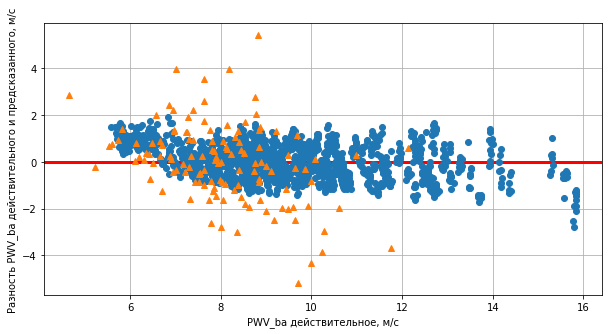

In [56]:
raznost_test = []
raznost_real = []
for i in range(len(predicted_list_test)):
    raznost_test.append(predicted_list_test[i] - labels_list_test[i])


for i in range(len(predicted_list_real)):
    raznost_real.append(predicted_list_real[i] - labels_list_real[i])

plt.figure(figsize=(10, 5))
plt.axhline(y=0, color='r', linestyle='-', lw=3)
plt.plot(labels_list_test, raznost_test, 'o', label='Синтетические данные')
plt.plot(labels_list_real, raznost_real, '^', label='Реальные данные')
plt.xlabel('PWV_ba действительное, м/с')
plt.ylabel('Разность PWV_ba действительного и предсказанного, м/с')
plt.grid(True)
plt.savefig(f"BLAND ALTMAN NEURAL NETWORK")

In [59]:
import numpy as np
raznost_real_new = [raznost_real[i].numpy()[0][0] for i in range(len(raznost_real))]
#labels_list_real
print(f'Среднеквадратичное отклонение {np.std(raznost_real_new)}')
#print(f'Среднеквадратичное отклонение {np.std(raznost_test)}')

Среднеквадратичное отклонение 1.6606363630665557


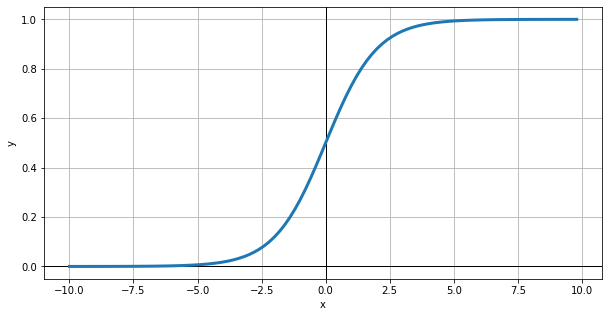

In [2195]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

plt.figure(figsize=(10, 5))
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.axhline(lw=1, c='black')
plt.axvline(lw=1, c='black')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x,sig, lw=3)
plt.savefig('sigmoid.png')
#plt.show()

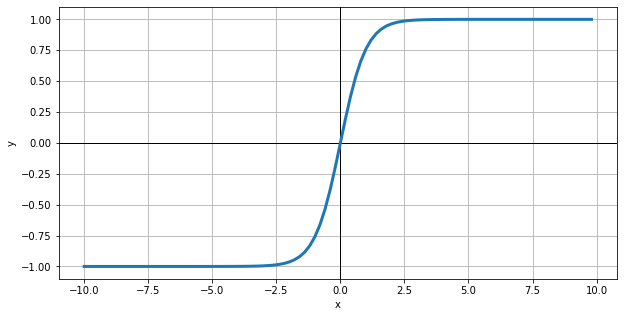

In [2196]:
import math

def tanh(x):
    a = []
    for item in x:
        a.append(2/(1+math.exp(-2*item)) - 1)
    return a

plt.figure(figsize=(10, 5))
x = np.arange(-10., 10., 0.2)
sig = tanh(x)
plt.axhline(lw=1, c='black')
plt.axvline(lw=1, c='black')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x,sig, lw=3)
plt.savefig('tanh.png')
#plt.show()

<ipython-input-2-734adcc9b148>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  relu = np.vectorize(lambda x: x if x > 0 else 0, otypes=[np.float])


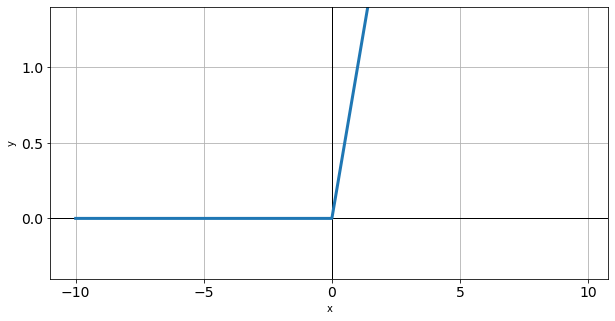

In [2]:
import numpy as np

def plot(func, yaxis=(-1.4, 1.4)):
    plt.ylim(yaxis)
    plt.locator_params(nbins=5)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axhline(lw=1, c='black')
    plt.axvline(lw=1, c='black')
    plt.grid(True)
    #plt.box(on=None)
    plt.plot(x, func(x), lw=3)

relu = np.vectorize(lambda x: x if x > 0 else 0, otypes=[np.float])

plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plot(relu, yaxis=(-0.4, 1.4))
plt.savefig('relu.png')


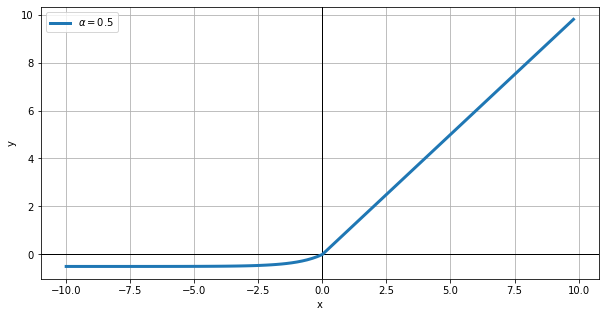

In [15]:
import math
import numpy as np
from matplotlib import pyplot as plt

def elu(z,alpha):
    a = []
    for item in z:
        ap = item if item >= 0 else alpha*(math.exp(item)-1)
        a.append(ap)
    return a

plt.figure(figsize=(10, 5))
x = np.arange(-10., 10., 0.2)
sig = elu(x, 0.5)
plt.axhline(lw=1, c='black')
plt.axvline(lw=1, c='black')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x,sig, lw=3, label=r'$\alpha=0.5$')
plt.legend()
plt.savefig('elu.png')
